In [1]:
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Data importing & inspection:

In [3]:
# Load the Dataset
data = pd.read_excel("Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# 2. Data Preparation:

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [9]:
# Here we can see that min value for Quantity column is negative
# changing the datatype to str
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [10]:
# also If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.
df_without_Cancellation = df[~df['InvoiceNo'].str.contains('C',na=False)].reset_index(drop=True)
df_without_Cancellation

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [11]:
# Checking how many values are present for unitprice==0
len(df_without_Cancellation[df_without_Cancellation['UnitPrice']==0])

40

In [12]:
df_final=df_without_Cancellation[df_without_Cancellation['UnitPrice']>0]
df_final.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


In [13]:
df_final.shape

(397884, 8)

# Feature Engineering:

In [74]:
df_final["year"] = df_final["InvoiceDate"].apply(lambda x: x.year)
df_final["month_num"] = df_final["InvoiceDate"].apply(lambda x: x.month)
df_final["day_num"] = df_final["InvoiceDate"].apply(lambda x: x.day)
df_final["hour"] = df_final["InvoiceDate"].apply(lambda x: x.hour)
df_final["minute"] = df_final["InvoiceDate"].apply(lambda x: x.minute)

In [75]:
df_final['Month']=df_final['InvoiceDate'].dt.month_name()
df_final['Day']=df_final['InvoiceDate'].dt.day_name()

In [76]:
df_final['TotalSpending'] = df_final['Quantity'] * df_final['UnitPrice']

In [77]:
RFM_data = df_final.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df_final['InvoiceDate'].max() - x.max()).days,
                                                             'InvoiceNo': 'count',
                                                             'TotalSpending':'sum'
                                                             })
RFM_data.columns=['Recency','Frequency','Monetary']
RFM_data=RFM_data[RFM_data['Monetary']>0]

RFM_data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


# EDA:

### *Top 10 items in terms of description(Name)*

In [18]:
top_10_product=df_final['Description'].value_counts().reset_index().rename(columns={'Description':'Product_name','count':'Count'})
top_10_product

,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1723
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1396
...,...,...
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1


Text(0.5, 1.0, 'Top 10 products')

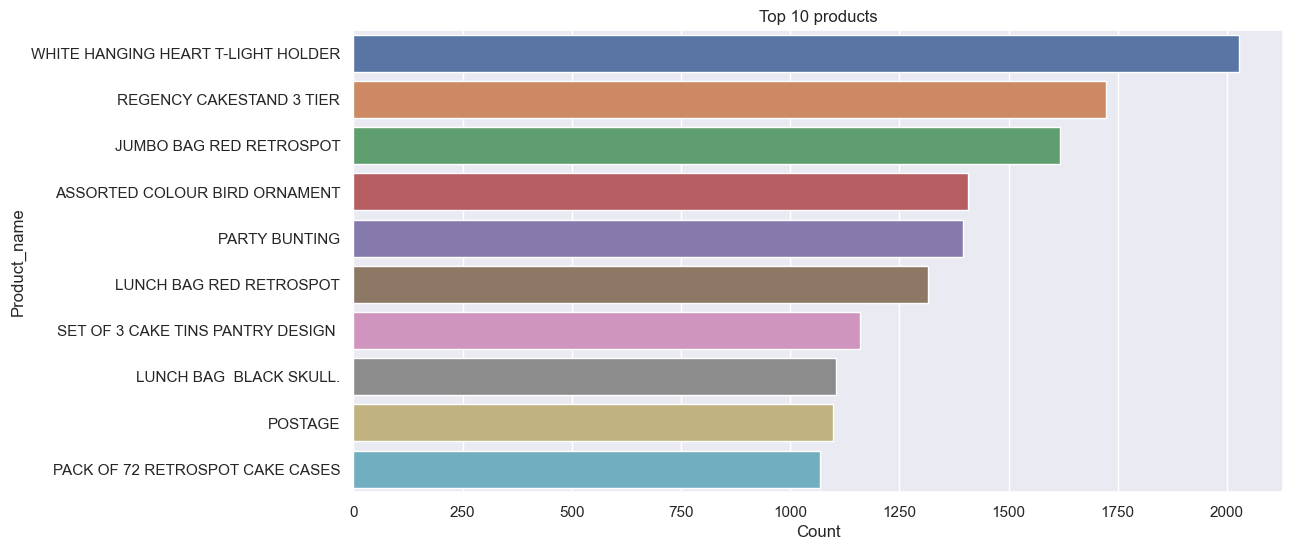

In [19]:
# top 10 product in terms of description
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_product['Count'].head(10),y=top_10_product['Product_name'].head(10))
plt.title('Top 10 products')

Observations

*WHITE HANGING HEART T-LIGHT HOLDER is the highest selling product almost 2018 units were sold*

*REGENCY CAKESTAND 3 TIER is the 2nd highest selling product almost 1723 units were sold*

### *Top 10 items in terms of CustomerID.*

In [20]:
top_10_customers=df_final['CustomerID'].value_counts().reset_index().rename(columns={'count':'Products_purchasing_Count'}).head(10)
top_10_customers

,CustomerID,Products_purchasing_Count
0,17841.0,7847
1,14911.0,5675
2,14096.0,5111
3,12748.0,4595
4,14606.0,2700
5,15311.0,2379
6,14646.0,2076
7,13089.0,1818
8,13263.0,1677
9,14298.0,1637


Text(0.5, 1.0, 'Top 10 frequent Customers.')

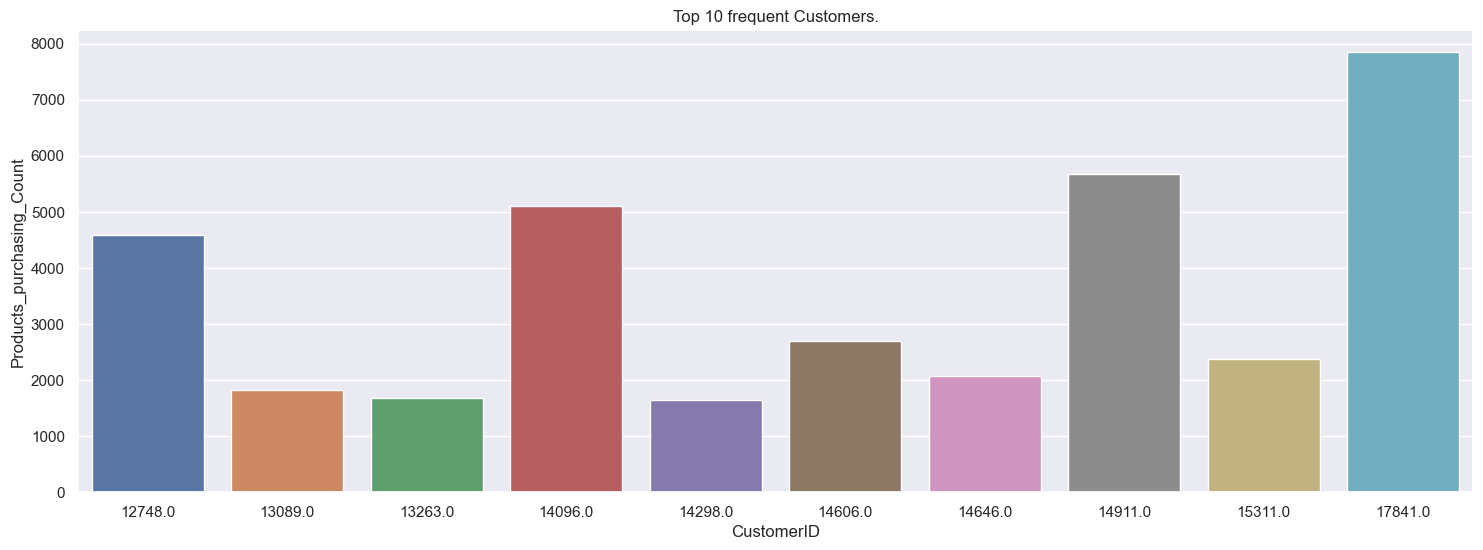

In [21]:
# Top 10 frequent Customers
plt.figure(figsize=(18,6))
sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers['Products_purchasing_Count'].head(10))
plt.title('Top 10 frequent Customers.')

Observation

*CustomerID- 17841 had purchased highest number of products*

*CustomerID-14911 is the 2nd higest customer who purchased the most the products*

In [22]:
top_5_countries=df_final['Country'].value_counts().reset_index().rename(columns={'count':'Customer_count'})
top_5_countries

,Country,Customer_count
0,United Kingdom,354321
1,Germany,9040
2,France,8341
3,EIRE,7236
4,Spain,2484
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1841
8,Portugal,1462
9,Australia,1182


Text(0.5, 1.0, 'Top 5 Countries based on highest number of customers')

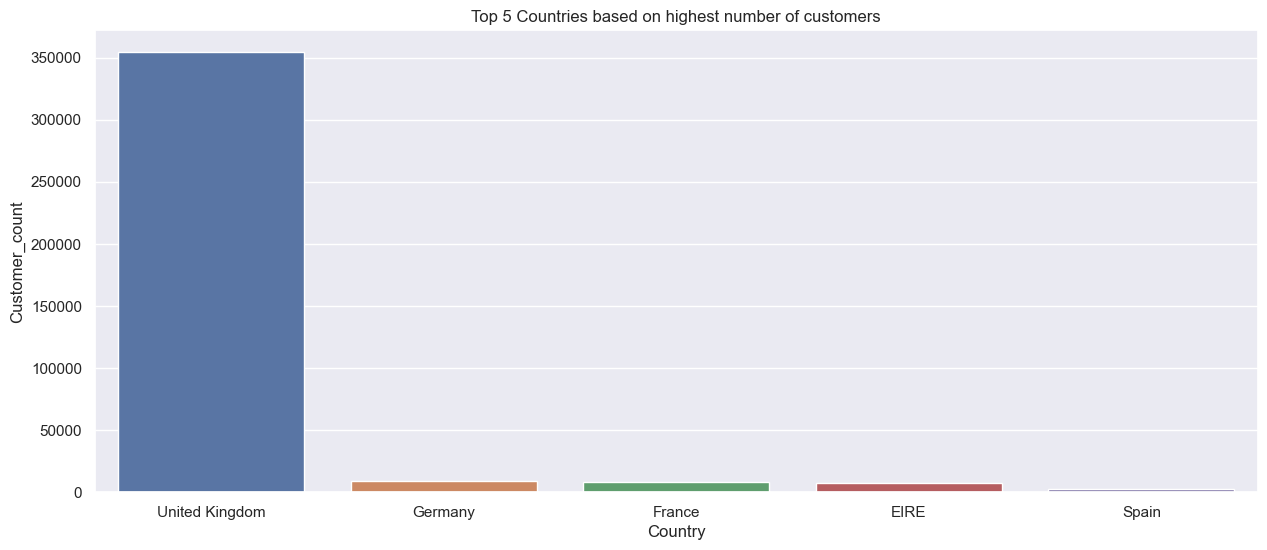

In [23]:
# top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].head(5),y=top_5_countries['Customer_count'].head(5))
plt.title('Top 5 Countries based on highest number of customers')

Observation

*UK has highest number of customers*

*Germany,France and IreLand has almost equal number of customers*

Text(0.5, 1.0, 'Top 5 Countries based on least number of customers ')

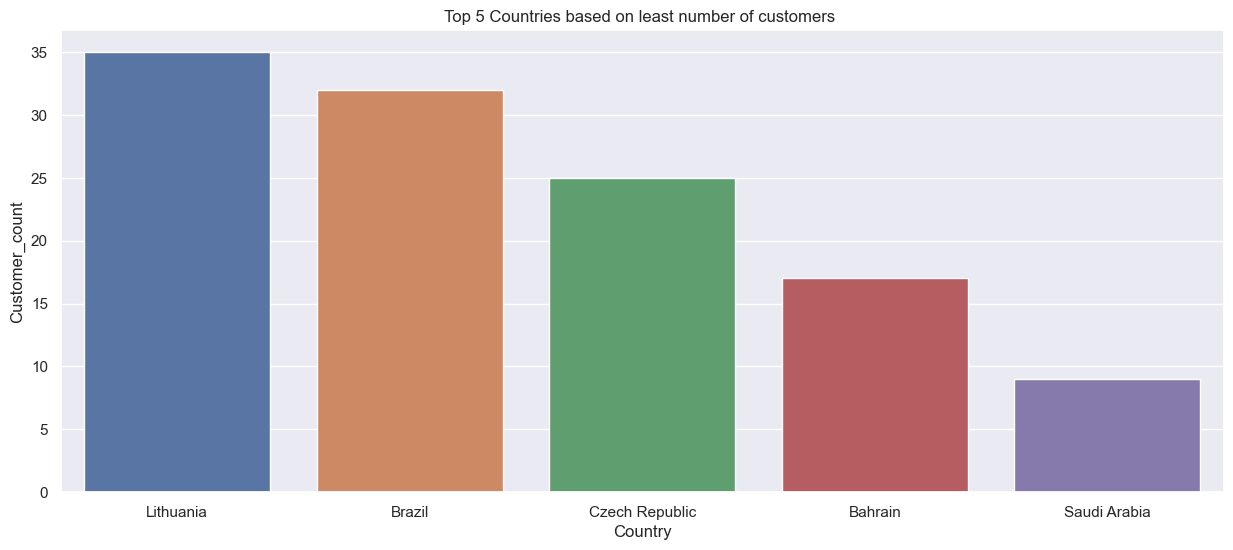

In [24]:
# top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
sns.barplot(x=top_5_countries['Country'].tail(5),y=top_5_countries['Customer_count'].tail(5))
plt.title('Top 5 Countries based on least number of customers ')

Observations

*There are very less customers from Saudi Arabia*

*Bahrain is the 2nd Country having least number of customers*

In [25]:
sales_in_month=df_final['Month'].value_counts().reset_index().rename(columns={'count':'Sales_count'})
sales_in_month

,Month,Sales_count
0,November,64531
1,October,49554
2,December,43461
3,September,40028
4,May,28320
5,June,27185
6,March,27175
7,August,27007
8,July,26825
9,April,22642


Text(0.5, 1.0, 'Sales count in different Months ')

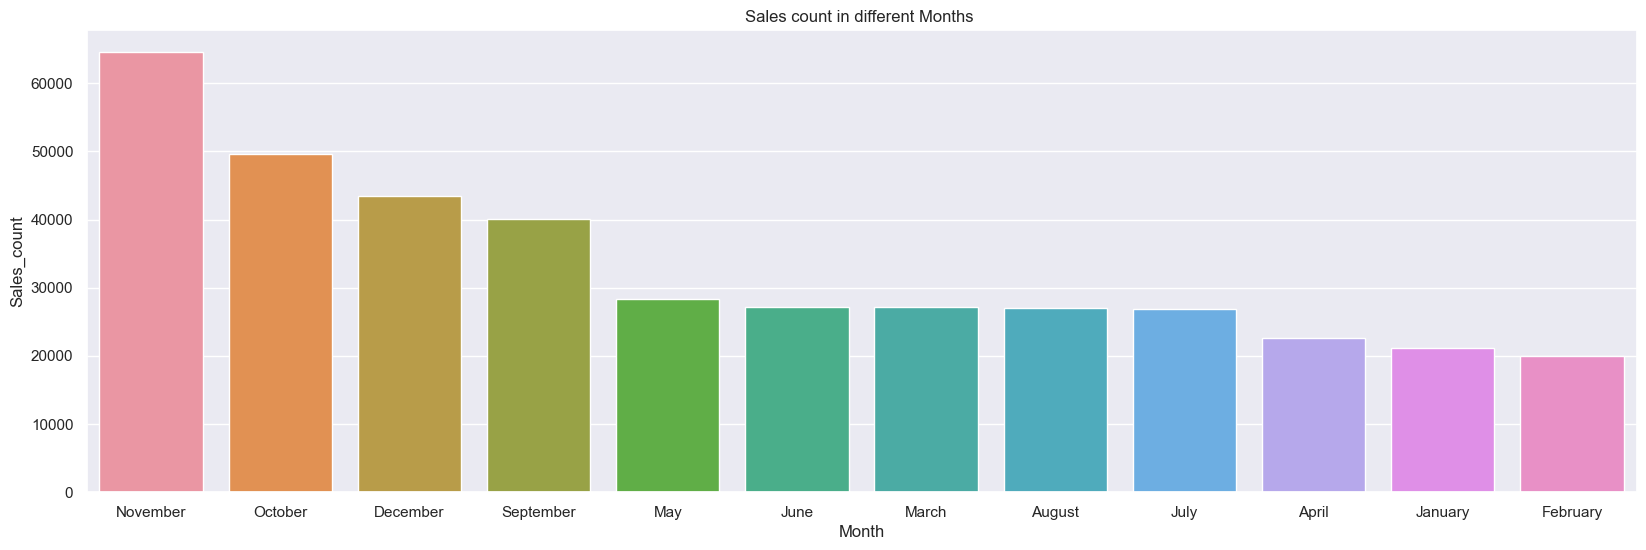

In [26]:
# Sales count in different months.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'])
plt.title('Sales count in different Months ')

Observations

*Most of the sale happened in Novmenber month.*

*February Month had least sales.*

In [27]:
sales_on_day_basis=df_final['Day'].value_counts().reset_index().rename(columns={"count":'Sale_count'})
sales_on_day_basis

,Day,Sale_count
0,Thursday,80035
1,Wednesday,68885
2,Tuesday,66473
3,Monday,64893
4,Sunday,62773
5,Friday,54825


Text(0.5, 1.0, 'Sales count on different Days ')

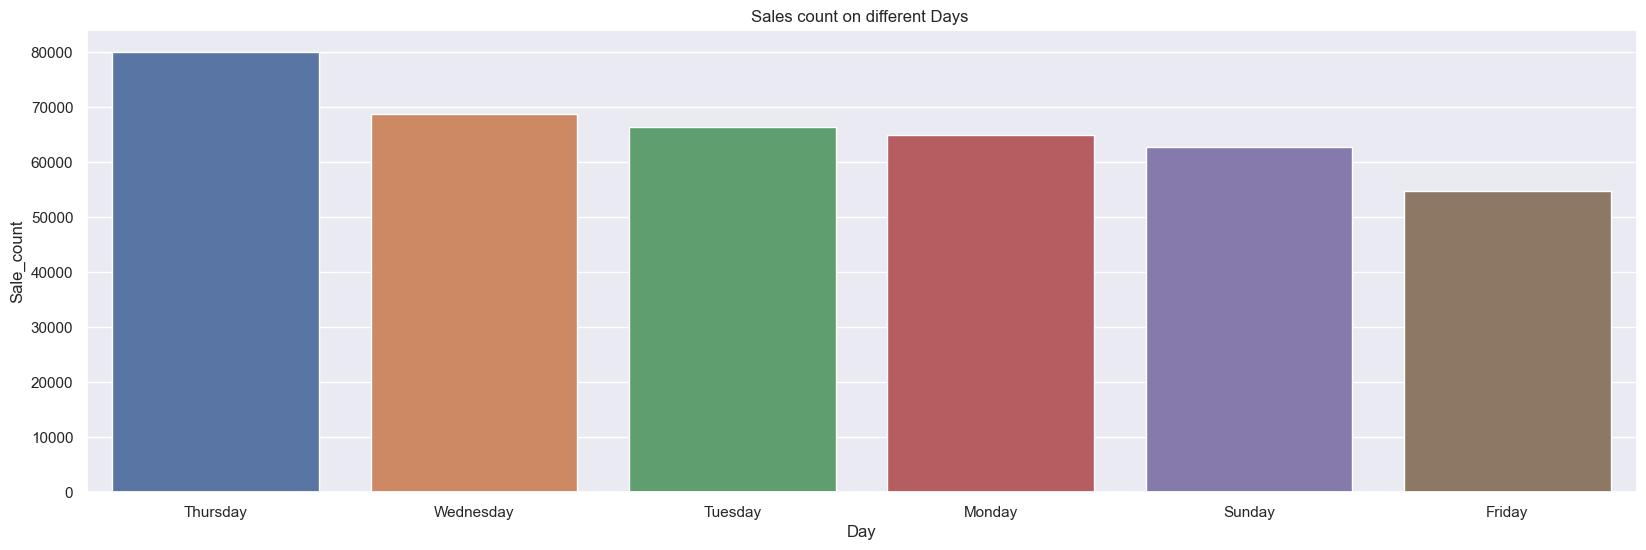

In [28]:
# Sales count on different days.
plt.figure(figsize=(20,6))
sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['Sale_count'])
plt.title('Sales count on different Days ')

Observation

*Sales On Thursdays are very high.*

*Sales On Fridays are very less*

In [29]:
df_final['hour'].unique()
def time(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11) :
    return'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening' 
df_final['Day_time_type']=df_final['hour'].apply(time)

In [30]:
sales_timing=df_final['Day_time_type'].value_counts().reset_index().rename(columns={'count':'Sales_count'})
sales_timing

,Day_time_type,Sales_count
0,Afternoon,272738
1,Morning,118095
2,Evening,7051


Text(0.5, 1.0, 'Sales count in different day timings')

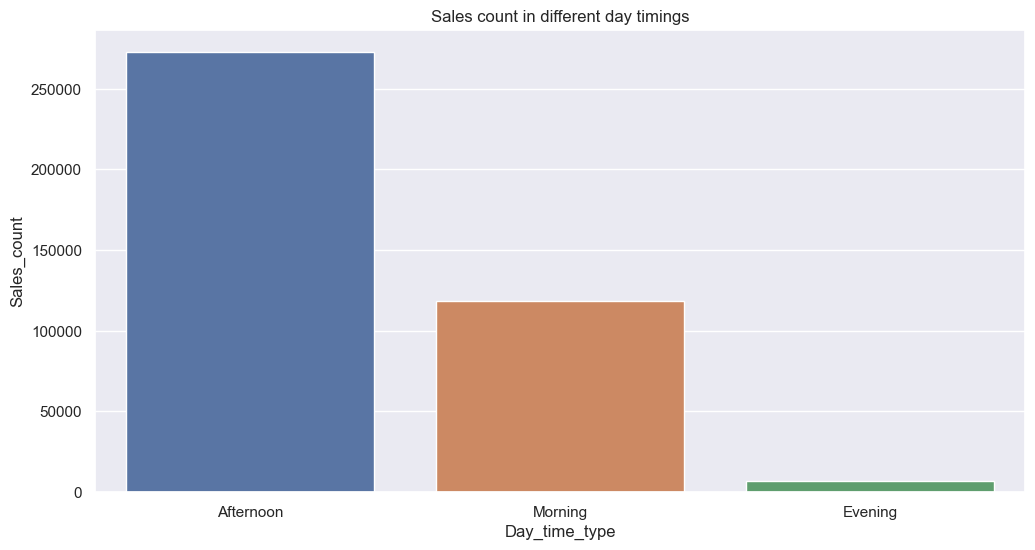

In [31]:
# Sales count on different days.
plt.figure(figsize=(12,6))
sns.barplot(x=sales_timing['Day_time_type'],y=sales_timing['Sales_count'])
plt.title('Sales count in different day timings')

Observations

*Most of the sales happens in the afternoon.*

*Least sales happens in the evening.*

# Model Building

The RFM framework is a marketing and customer segmentation technique that businesses use to analyze and categorize their customer base. RFM stands for Recency, Frequency, and Monetary Value, and it helps businesses understand and target their customers more effectively by considering three key dimensions of customer behavior:

Recency (R): This dimension assesses how recently a customer has made a purchase or interacted with the business. Customers who have engaged with the business more recently are often considered more valuable, as they are more likely to make repeat purchases or continue their engagement. Recency is usually measured in terms of days, months, or years since the last transaction or interaction.

Frequency (F): Frequency represents how often a customer makes purchases or interacts with the business. Customers who buy or engage more frequently are often considered more loyal and valuable. Frequency is typically measured as the number of transactions or interactions within a specific time period.

Monetary Value (M): Monetary Value refers to the amount of money a customer has spent on products or services from the business. Customers with higher monetary value are those who make larger and more profitable purchases. This dimension is measured in terms of the total amount spent over a specific period.

To implement the RFM framework, businesses usually assign scores or ranks to customers based on these three dimensions. For example, they might rate each customer on a scale from 1 to 5 for each of the R, F, and M dimensions, with higher scores indicating better recency, higher frequency, or greater monetary value.

Once the RFM scores are assigned, businesses can segment their customer base into different groups or clusters. These segments can help inform marketing strategies, such as:

Retention: Targeting customers with high recency and frequency to encourage repeat business and loyalty.
Win-back: Identifying customers who have made purchases in the past but have lapsed in activity (low recency) and devising strategies to re-engage them.
High-value: Focusing on customers with high monetary value to maximize revenue and profitability.
Low-value: Identifying customers with low monetary value and deciding whether it's worth investing in strategies to increase their value or simply maintaining minimal engagement.
The RFM framework is a simple and effective way for businesses to tailor their marketing efforts, personalize communications, and allocate resources more efficiently based on customer behavior patterns. However, it's important to note that RFM is just one tool in the marketing toolkit and may need to be supplemented with other data and strategies for a more comprehensive understanding of customers.

In [32]:
RFM_analysis = RFM_data.copy()

In [33]:
RFM_analysis.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [34]:
# Descriptive Stats= Recency
RFM_analysis.Recency.describe()

count    4338.000000
mean       91.536422
std       100.014169
min         0.000000
25%        17.000000
50%        50.000000
75%       141.000000
max       373.000000
Name: Recency, dtype: float64

Text(0.5, 1.0, 'Distribution of Recency')

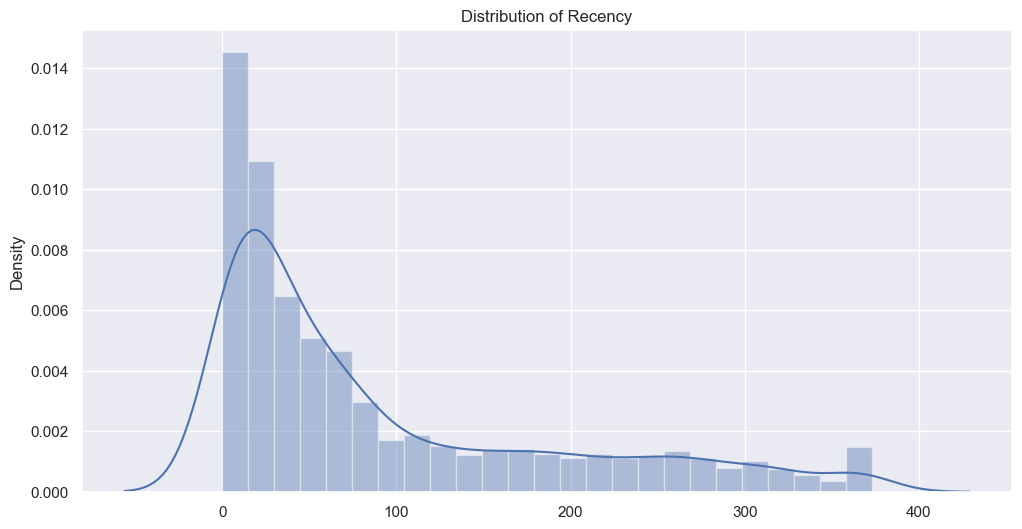

In [35]:
plt.figure(figsize=(12,6))
sns.distplot(x=RFM_analysis['Recency'])
plt.title('Distribution of Recency')

*Distribution of Recency is right skewed.*

In [36]:
# Descriptive Stats= Frequency
RFM_analysis['Frequency'].describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

Text(0.5, 1.0, 'Distribution of Frequency')

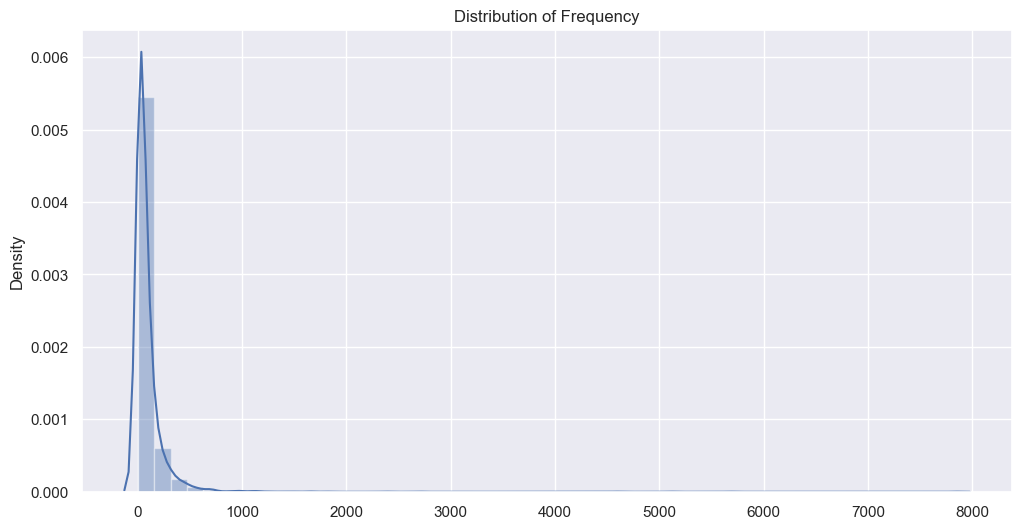

In [37]:
plt.figure(figsize=(12,6))
sns.distplot(x=RFM_analysis['Frequency'])
plt.title('Distribution of Frequency')

*Distribution of Frequency is highly right skewed.*

In [38]:
# Descriptive Stats= Monetary
RFM_analysis['Monetary'].describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64

Text(0.5, 1.0, 'Distribution of Monetary')

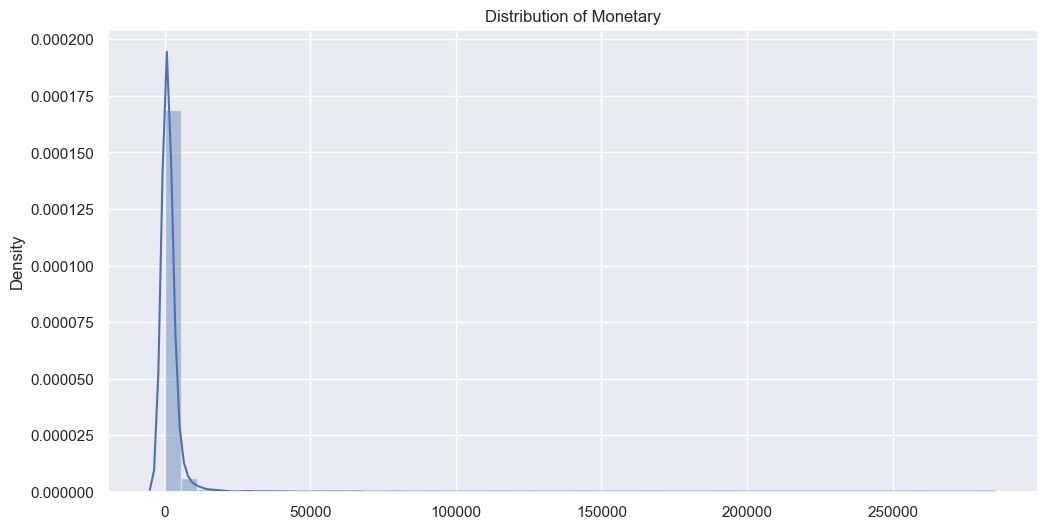

In [39]:
plt.figure(figsize=(12,6))
sns.distplot(x=RFM_analysis['Monetary'])
plt.title('Distribution of Monetary')

*Distribution of Monetary is highly right skewed.*

In [40]:
# lower the recency, bad for the company
# higher value of frequency and monetary lead to a good consumer. Here higher value = 1 in reverse way.
RFM_analysis["R_score"]=pd.qcut(RFM_analysis["Recency"],q=5,labels=[5,4,3,2,1])
RFM_analysis["F_score"]=pd.qcut(RFM_analysis['Frequency'].rank(method='first'),q=5,labels=[1,2,3,4,5])
RFM_analysis["M_score"]=pd.qcut(RFM_analysis['Monetary'],q=5,labels=[1,2,3,4,5])

In [41]:
# Add a new column to combine RFM score
RFM_analysis['RFM_Group'] = (RFM_analysis.R_score.astype(str)+RFM_analysis.F_score.astype(str))

In [42]:
RFM_analysis

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,5,11
12347.0,1,182,4310.00,5,5,5,55
12348.0,74,31,1797.24,2,3,4,23
12349.0,18,73,1757.55,4,4,4,44
12350.0,309,17,334.40,1,2,2,12
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,11
18281.0,180,7,80.82,1,1,1,11
18282.0,7,12,178.05,5,1,1,51


In [43]:
RFM_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Recency    4338 non-null   int64   
 1   Frequency  4338 non-null   int64   
 2   Monetary   4338 non-null   float64 
 3   R_score    4338 non-null   category
 4   F_score    4338 non-null   category
 5   M_score    4338 non-null   category
 6   RFM_Group  4338 non-null   object  
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 182.8+ KB


In [44]:
seg={
    r'[1-2][1-2]':'hibernating',
    r'[1-2][3-4]':'at_Risk',
    r'[1-2]5':'cant_loose',
    r'3[1-2]':'about_to_sleep',
    r'33':'need_attention',
    r'[3-4][4-5]':'loyal_customer',
    r'41':'promising',
    r'51':'new_customer',
    r'[4-5][2-3]':'potential_loyalists',
    r'5[4-5]':'champions',
}
RFM_analysis['RFM_Loyalty_Level']=RFM_analysis['RFM_Group'].replace(seg, regex=True)
RFM_analysis

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Loyalty_Level
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,5,11,hibernating
12347.0,1,182,4310.00,5,5,5,55,champions
12348.0,74,31,1797.24,2,3,4,23,at_Risk
12349.0,18,73,1757.55,4,4,4,44,loyal_customer
12350.0,309,17,334.40,1,2,2,12,hibernating
...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,11,hibernating
18281.0,180,7,80.82,1,1,1,11,hibernating
18282.0,7,12,178.05,5,1,1,51,new_customer


In [45]:
RFM_analysis[['Recency','Frequency','Monetary','RFM_Loyalty_Level']].groupby('RFM_Loyalty_Level').agg({'mean', 'min', 'max','count'}).round(2)

Recency                   Frequency                     \
                        max count    mean min       max count    mean  min   
RFM_Loyalty_Level                                                            
about_to_sleep           71   321   52.84  33        29   321   15.68    1   
at_Risk                 373   578  166.37  72       119   578   56.11   29   
cant_loose              371    81  145.27  72       543    81  182.30  122   
champions                12   607    4.92   0      7847   607  288.62   58   
hibernating             373  1049  210.39  72        29  1049   13.39    1   
loyal_customer           71   827   33.03  13      1204   827  156.35   58   
need_attention           71   207   51.65  33        58   207   41.43   29   
new_customer             10    55    5.71   0        13    55    7.35    1   
potential_loyalists      32   506   15.46   0        58   506   34.32   14   
promising                32   107   22.05  13        14   107    7.19    1   

                      Monetary                         
                           max count     mean     min  
RFM_Loyalty_Level                                      
about_to_sleep         7330.80   321   475.30    6.20  
at_Risk               11072.67   578   984.73   67.23  
cant_loose            10254.18    81  2393.52  411.53  
champions            280206.02   607  6950.14  190.19  
hibernating           77183.60  1049   530.88    3.75  
loyal_customer       124914.53   827  2825.69  155.37  
need_attention        11581.80   207   848.14   97.97  
new_customer         168472.50    55  3742.13   41.99  
potential_loyalists   26879.04   506   900.48   68.84  
promising              6748.80   107   432.68   20.80

In [46]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFM_analysis['Recency'] = [handle_neg_n_zero(x) for x in RFM_analysis.Recency]
RFM_analysis['Monetary'] = [handle_neg_n_zero(x) for x in RFM_analysis.Monetary]

In [47]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_rfm_df = RFM_analysis[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)
Log_rfm_df

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.784,0.000,11.254
12347.0,0.000,5.204,8.369
12348.0,4.304,3.434,7.494
12349.0,2.890,4.290,7.472
12350.0,5.733,2.833,5.812
...,...,...,...
18280.0,5.624,2.303,5.196
18281.0,5.193,1.946,4.392
18282.0,1.946,2.485,5.182


Text(0.5, 1.0, 'Distribution of Recency')

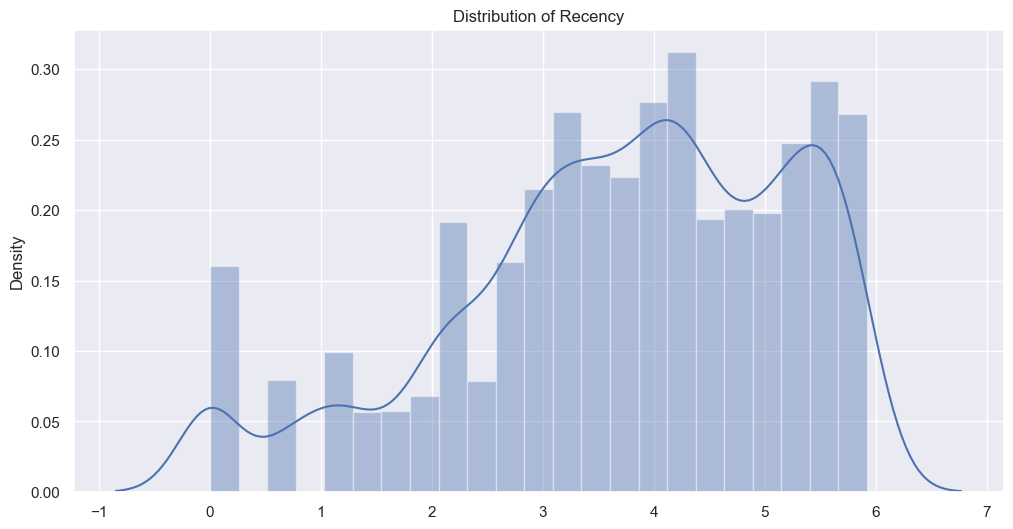

In [48]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Recency'])
plt.title('Distribution of Recency')

Text(0.5, 1.0, 'Distribution of Frequency')

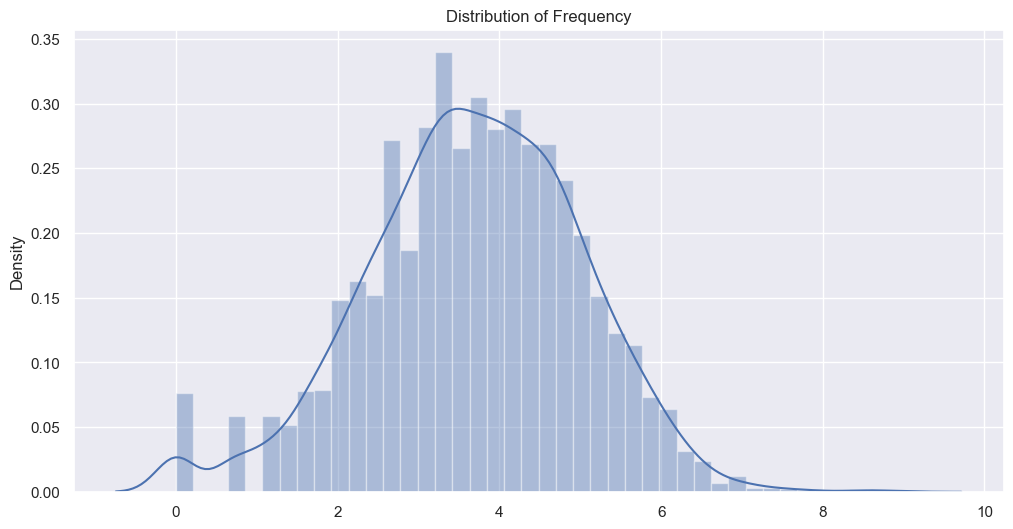

In [49]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Frequency'])
plt.title('Distribution of Frequency')

Text(0.5, 1.0, 'Distribution of Monetary')

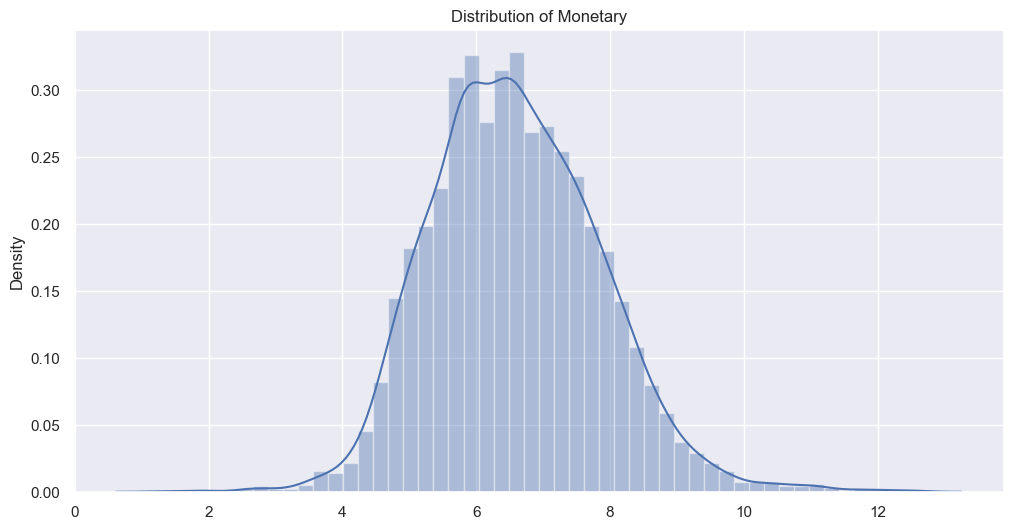

In [50]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Monetary'])
plt.title('Distribution of Monetary')

In [51]:
RFM_analysis['Recency_log'] = RFM_analysis['Recency'].apply(math.log)
RFM_analysis['Frequency_log'] = RFM_analysis['Frequency'].apply(math.log)
RFM_analysis['Monetary_log'] = RFM_analysis['Monetary'].apply(math.log)
RFM_analysis

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,1,1,5,11,hibernating,5.783825,0.000000,11.253942
12347.0,1,182,4310.00,5,5,5,55,champions,0.000000,5.204007,8.368693
12348.0,74,31,1797.24,2,3,4,23,at_Risk,4.304065,3.433987,7.494007
12349.0,18,73,1757.55,4,4,4,44,loyal_customer,2.890372,4.290459,7.471676
12350.0,309,17,334.40,1,2,2,12,hibernating,5.733341,2.833213,5.812338
...,...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,11,hibernating,5.624018,2.302585,5.196285
18281.0,180,7,80.82,1,1,1,11,hibernating,5.192957,1.945910,4.392224
18282.0,7,12,178.05,5,1,1,51,new_customer,1.945910,2.484907,5.182064


# KMeans Clustering:

In [80]:
RFM_Clustering = RFM_analysis[['Recency_log','Frequency_log','Monetary_log']]
RFM_Clustering

,Recency_log,Frequency_log,Monetary_log
CustomerID,,,
12346.0,5.783825,0.000000,11.253942
12347.0,0.000000,5.204007,8.368693
12348.0,4.304065,3.433987,7.494007
12349.0,2.890372,4.290459,7.471676
12350.0,5.733341,2.833213,5.812338
...,...,...,...
18280.0,5.624018,2.302585,5.196285
18281.0,5.192957,1.945910,4.392224
18282.0,1.945910,2.484907,5.182064


In [81]:
Q1 = RFM_Clustering.Monetary_log.quantile(0.05)
Q3 = RFM_Clustering.Monetary_log.quantile(0.95)
IQR = Q3 - Q1
RFM_Clustering = RFM_Clustering[(RFM_Clustering.Monetary_log >= Q1 - 1.5*IQR) & (RFM_Clustering.Monetary_log <= Q3 + 1.5*IQR)]

Q1 = RFM_Clustering.Frequency_log.quantile(0.05)
Q3 = RFM_Clustering.Frequency_log.quantile(0.95)
IQR = Q3 - Q1
RFM_Clustering = RFM_Clustering[(RFM_Clustering.Frequency_log >= Q1 - 1.5*IQR) & (RFM_Clustering.Frequency_log <= Q3 + 1.5*IQR)]

Q1 = RFM_Clustering.Recency_log.quantile(0.05)
Q3 = RFM_Clustering.Recency_log.quantile(0.95)
IQR = Q3 - Q1
RFM_Clustering = RFM_Clustering[(RFM_Clustering.Recency_log >= Q1 - 1.5*IQR) & (RFM_Clustering.Recency_log <= Q3 + 1.5*IQR)]
RFM_Clustering

,Recency_log,Frequency_log,Monetary_log
CustomerID,,,
12346.0,5.783825,0.000000,11.253942
12347.0,0.000000,5.204007,8.368693
12348.0,4.304065,3.433987,7.494007
12349.0,2.890372,4.290459,7.471676
12350.0,5.733341,2.833213,5.812338
...,...,...,...
18280.0,5.624018,2.302585,5.196285
18281.0,5.192957,1.945910,4.392224
18282.0,1.945910,2.484907,5.182064


In [82]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(RFM_Clustering)
scaled_data

array([[ 1.37335271, -2.77515957,  3.69871931],
       [-2.45138429,  1.1495495 ,  1.410201  ],
       [ 0.39481464, -0.18534723,  0.71641884],
       ...,
       [-1.16458977, -0.90111592, -1.11736527],
       [-1.72489223,  2.22351465,  0.83796882],
       [ 0.02026775,  0.42893082,  0.73389579]])

In [83]:
pca = PCA(random_state=123)
pca_result = pca.fit_transform(scaled_data)

In [84]:
explained_variance_ratio = pca.explained_variance_ratio_
n_components = pca.n_components_
print(explained_variance_ratio,n_components,pca.components_)

[0.71945108 0.19946567 0.08108324] 3 [[-0.50739099  0.60946042  0.60918994]
 [-0.86171445 -0.35754074 -0.36001781]
 [-0.00160638 -0.70761757  0.7065938 ]]


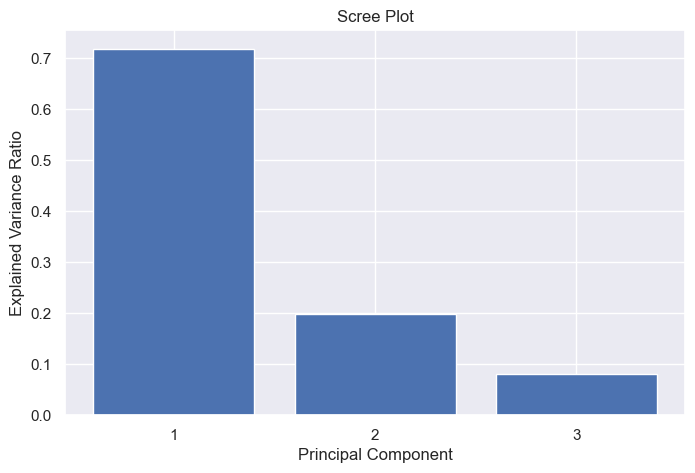

In [85]:
plt.figure(figsize=(8, 5))
plt.bar(['1','2','3'], explained_variance_ratio)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

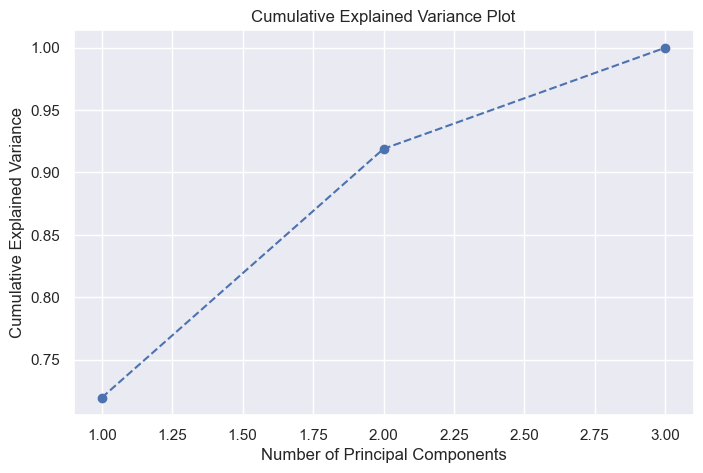

In [86]:
# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, 4), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### we can see that the first principal component explains about 80% of the variance in the data. The first two principal components explain about 90% of the variance, and the first three principal components explain about 95% of the variance. This suggests that we can reduce the dimensionality of the data from 3 to 2 without losing much information.

In [87]:
pca = PCA(n_components=2,random_state=123)
pca_result = pca.fit_transform(scaled_data)
pca.components_

array([[-0.50739099,  0.60946042,  0.60918994],
       [-0.86171445, -0.35754074, -0.36001781]])

In [88]:
df_pca_comp = pd.DataFrame(data=pca.components_,
                        columns=RFM_Clustering.columns,
                        index=['Component 1','Component 2'])
df_pca_comp

,Recency_log,Frequency_log,Monetary_log
Component 1,-0.507391,0.609460,0.609190
Component 2,-0.861714,-0.357541,-0.360018


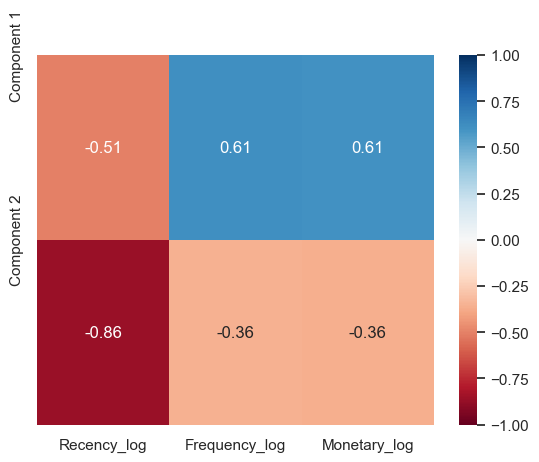

In [89]:
sns.heatmap(df_pca_comp,
           vmin=-1,
           vmax=1,
           cmap='RdBu',
           annot=True)
plt.yticks(ticks=[0,1],
    labels=['Component 1','Component 2'])

plt.show()

In [90]:
kmeans = KMeans(random_state=123)
kmeans.fit(pca_result)
lbs = kmeans.labels_
print(kmeans.labels_)

[3 1 3 ... 2 1 3]


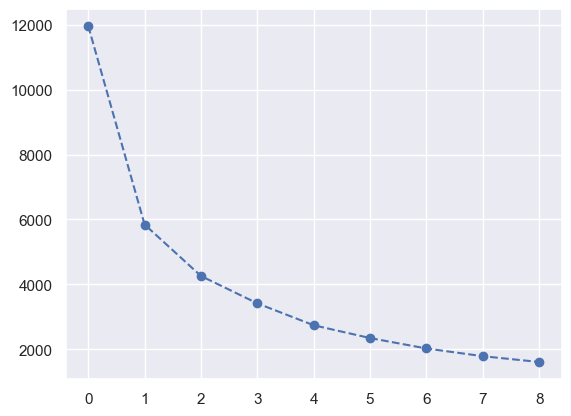

In [91]:
wss = []
for num_clusters in range(1,10):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100,random_state=123)
    kmeans.fit(pca_result)
    wss.append(kmeans.inertia_)
    
plt.plot(wss,marker='o',linestyle='--')

### Here we can see that Optimal value for cluster came out to be 4.

In [92]:
kmeans = KMeans(n_clusters=4,random_state=123)
kmeans.fit(pca_result)
lbs = kmeans.labels_

In [93]:
RFM_analysis['Cluster_Id'] = lbs
RFM_analysis

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster_Id
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,1,1,5,11,hibernating,5.783825,0.000000,11.253942,2
12347.0,1,182,4310.00,5,5,5,55,champions,0.000000,5.204007,8.368693,0
12348.0,74,31,1797.24,2,3,4,23,at_Risk,4.304065,3.433987,7.494007,2
12349.0,18,73,1757.55,4,4,4,44,loyal_customer,2.890372,4.290459,7.471676,2
12350.0,309,17,334.40,1,2,2,12,hibernating,5.733341,2.833213,5.812338,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,11,hibernating,5.624018,2.302585,5.196285,1
18281.0,180,7,80.82,1,1,1,11,hibernating,5.192957,1.945910,4.392224,1
18282.0,7,12,178.05,5,1,1,51,new_customer,1.945910,2.484907,5.182064,3


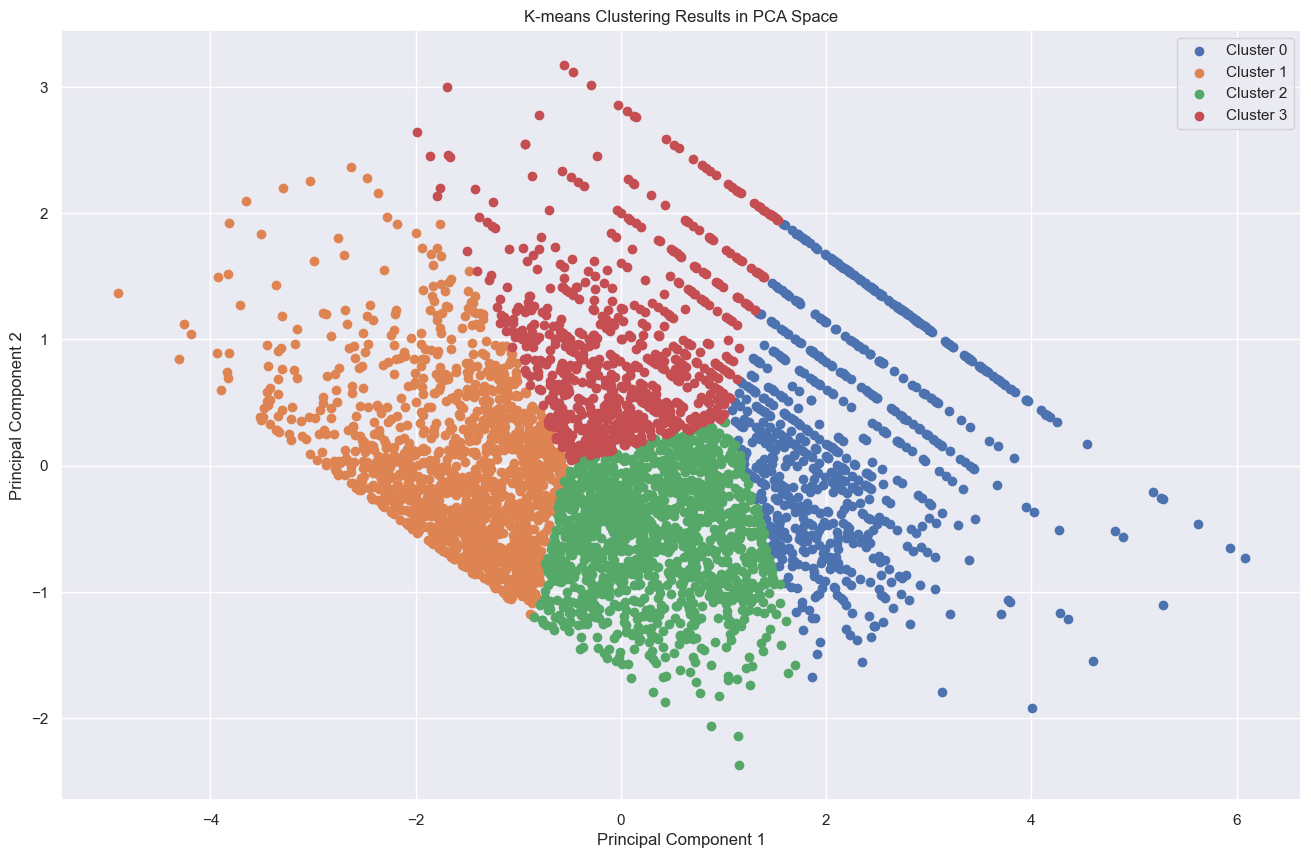

In [94]:
# Create a scatter plot of the PCA-transformed data
plt.figure(figsize=(16, 10))

# Plot points belonging to different clusters with different colors
for cluster_label in range(4):
    plt.scatter(pca_result[lbs == cluster_label, 0], pca_result[lbs == cluster_label, 1], label=f'Cluster {cluster_label}')

plt.title('K-means Clustering Results in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [95]:
RFM_analysis.groupby('Cluster_Id').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency               Monetary          \
                  mean min  max        mean min   max         mean     min   
Cluster_Id                                                                   
0            10.220960   1   86  295.584596   3  7847  7441.221730  493.28   
1           182.053041  13  373   15.487977   1    85   298.031019    3.75   
2            86.195335  12  372   83.592566   1   543  1564.434507  219.14   
3            17.631579   1   56   35.778947   1   151   592.289855   41.99   

                             
                  max count  
Cluster_Id                   
0           280206.02   792  
1             4055.72  1414  
2            77183.60  1372  
3             6977.04   760

### Summary And Conclusion of project

Firstly we did clustering based on RFM analysis. We had 10 clusters/Segmentation of customers based on RFM score.

Later we implemented the machine learning algorithms to cluster the customers.

Above clustering is done with recency,frequency and monetary data(Kmeans Clustering) as all 3 together will provide more information.

Cluster 0:

* Recency: This cluster has a relatively low mean recency, indicating that the customers in this cluster made their last purchases fairly recently.

* Frequency: These customers have a relatively high mean frequency, meaning they purchase from your business frequently.

* Monetary: The mean monetary value in this cluster is significantly higher compared to the other clusters. These are high-value customers with a wide range of spending.

Cluster 1:

* Recency: The customers in this cluster have a significantly higher mean recency, indicating that they haven't made purchases as recently.

* Frequency: The mean frequency is relatively low, suggesting that these customers do not buy as often.

* Monetary: The mean monetary value is also relatively low, indicating that the spending of these customers is lower compared to other clusters.

Cluster 2:

* Recency: Customers in this cluster have a moderate mean recency.

* Frequency: They have a moderate mean frequency as well.

* Monetary: The mean monetary value in this cluster is moderate, indicating customers with moderate spending behavior.

Cluster 3:

* Recency: This cluster has a low mean recency, suggesting that customers in this cluster made their last purchases relatively recently.

* Frequency: The mean frequency is also relatively low.

* Monetary: The mean monetary value is moderate, indicating that customers in this cluster spend moderately.

## Understanding these clusters can help you target marketing efforts, personalize offers, and improve customer retention strategies based on the specific needs and behaviors of each group